In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.6.0


In [4]:
mnist = keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print(len(x_train))

60000


- MNIST Dataset
http://yann.lecun.com/exdb/mnist/

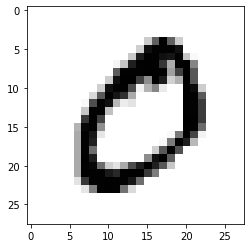

In [7]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [8]:
print(y_train[1])

0


- (x_train, y_train) 만을 가지고 학습한 후, (x_test, y_test) 로 테스트를 한다 생각하면 된다.

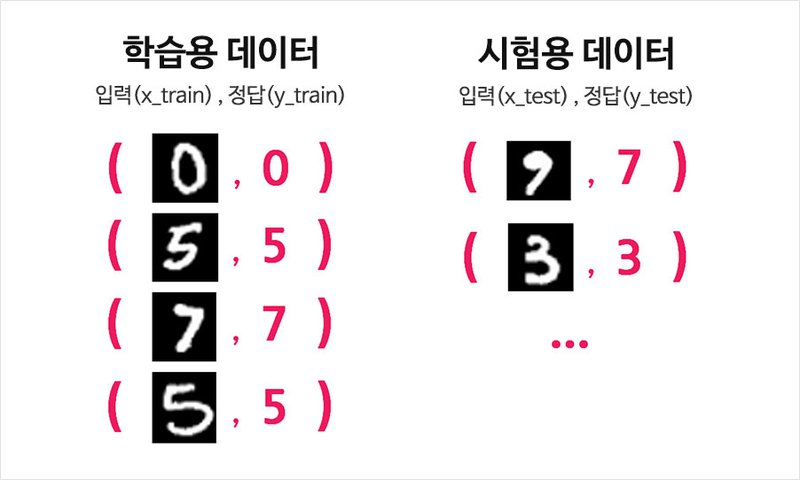


In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Training set, Validation set, Test set

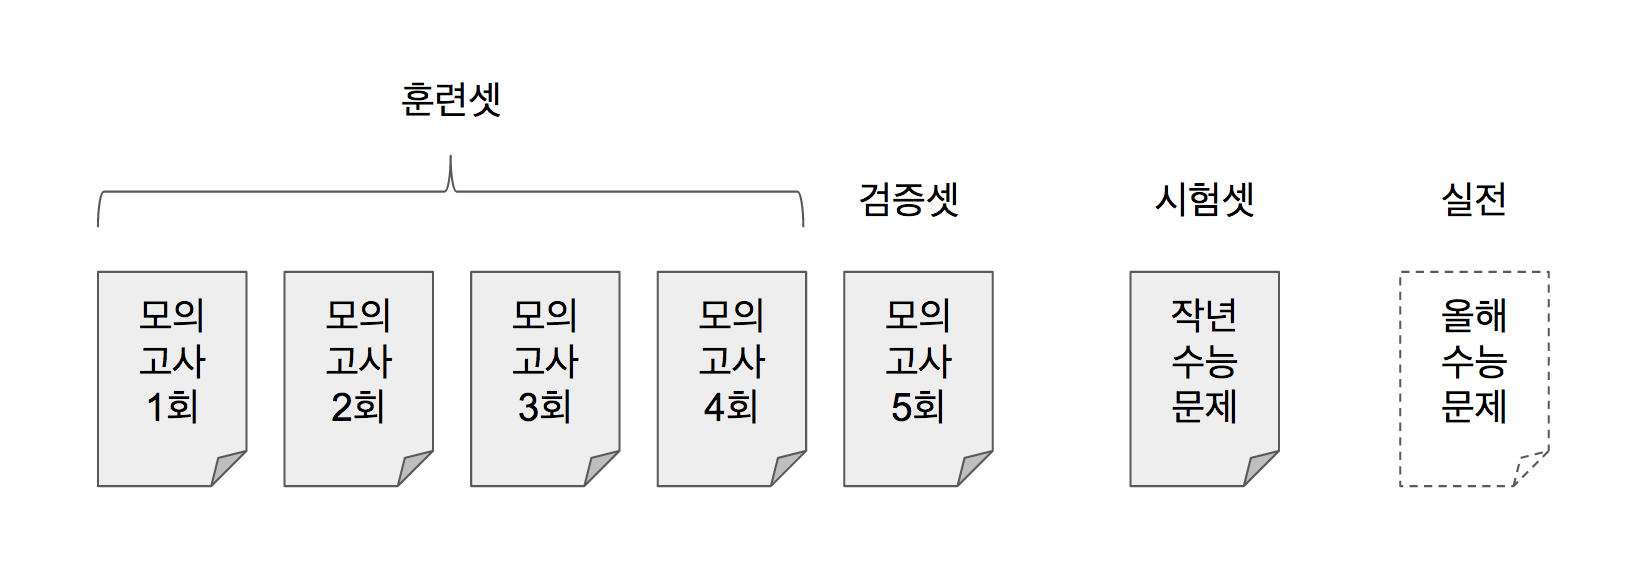   

- CS231n에서 test set, validation set, training set 에 대해 다뤘었다. 가장 이상적인 방법은 데이터를 train, val, test로 나눈 후 대부분의 데이터를 training set에 넣어 하이퍼파라미터를 정하여 여러가지 방법으로 학습을 해본 후, validation set에서 측정을 해본 후 가장 좋은 퍼포먼스를 보인 하이퍼파라미터를 정하는 것이다.

#### Cross-validation

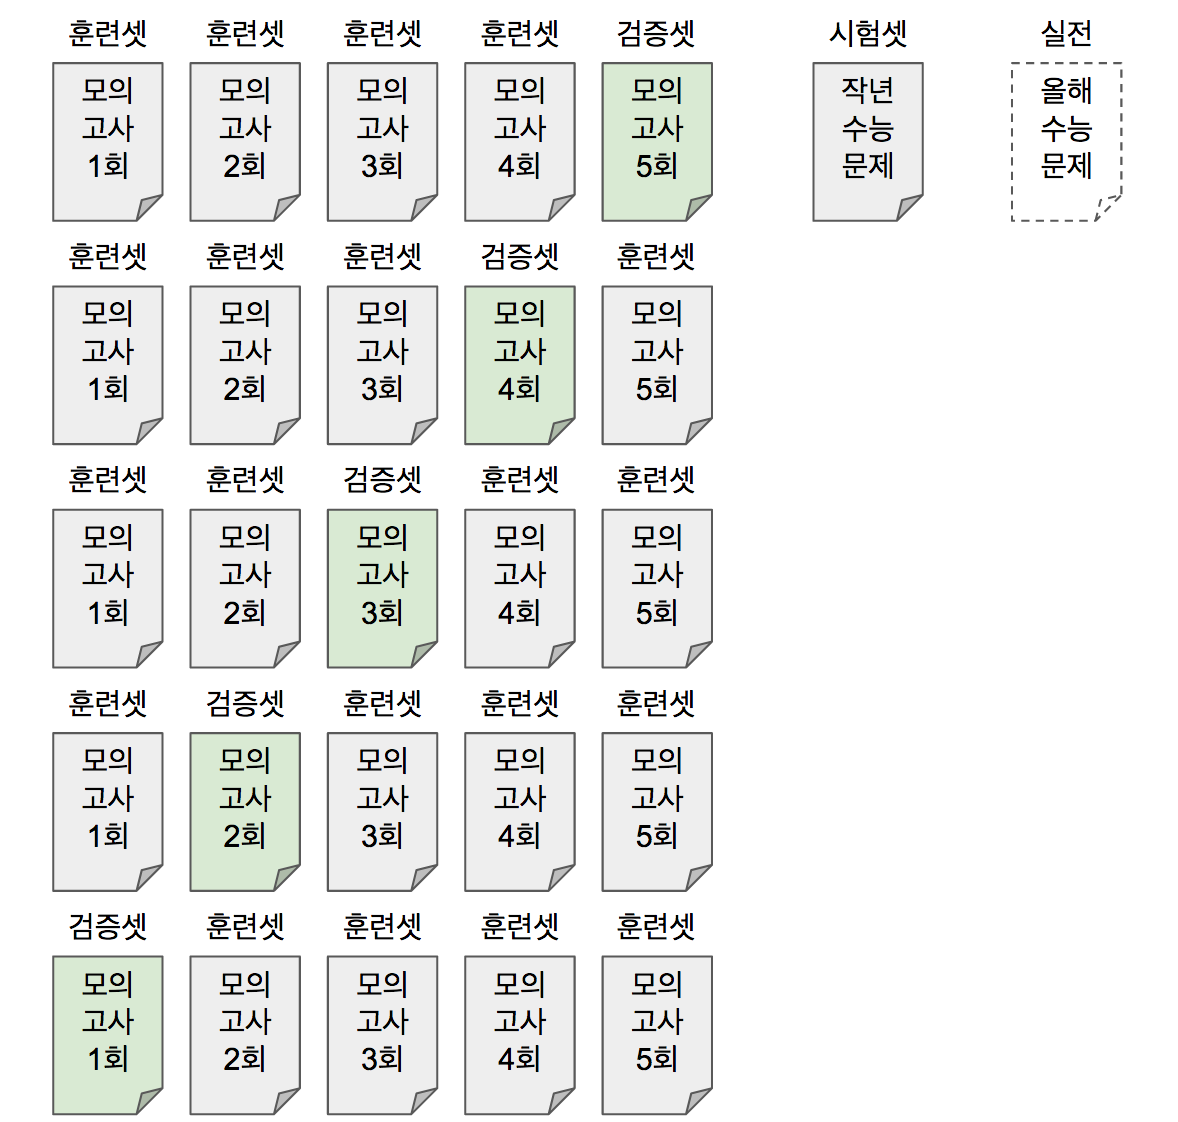

- 위의 경우에서 문제가 발생할 수 있다.
  1. 모의고사 5회에서 출제가 되지 않는 분야가 있을 수 있다.
  2. 모의고사 5회가 수능과 많이 다를 수 있다.
  3. 모의고사 5회가 1~4회와 난이도 및 범위가 다를 수 있다.

- 해서 이렇게 학습을 하는 것이 cross-validation이다. 이렇게 다섯 번의 검증결과를 평균 내어 이 평균값으로 성능을 정의한다.

- 단,교차검증은 계산량이 많기 때문에 데이터 수가 많지 않을 때 사용한다.

In [10]:
# MNIST 픽셀 값은 0~255 사이의 값을 가진다.
print(np.min(x_train), np.max(x_train))

# 0~1 사이의 값으로 정규화 시켜주는 것이 좋다.
x_train_norm, x_test_norm = x_train/255.0, x_test/255.0
print(np.min(x_train_norm), np.max(x_train_norm))

0 255
0.0 1.0


In [11]:
# LeNet

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

print('Model 에 추가된 Layer 갯수 : ', len(model.layers))

Model 에 추가된 Layer 갯수 :  7


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 딥러닝 네트워크 학습시키기

In [13]:
print("Before reshape    x_train_norm shape : {}".format(x_train_norm.shape))
print("Before reshape    x_test_norm shape : {}".format(x_test_norm.shape))

x_train_reshaped = x_train_norm.reshape(-1,28,28,1)    #데이터 갯수에 -1을 쓰면 reshape 시 자동계산이 된다.
x_test_reshaped = x_test_norm.reshape(-1,28,28,1)      #맨 마지막 숫자 1은 흑백이미지를 의미한다. 컬러라면 R,G,B로 3이 들어간다

print("After reshape    x_train_norm shape : {}".format(x_train_reshaped.shape))
print("After reshape    x_test_norm shape : {}".format(x_test_reshaped.shape))

Before reshape    x_train_norm shape : (60000, 28, 28)
Before reshape    x_test_norm shape : (10000, 28, 28)
After reshape    x_train_norm shape : (60000, 28, 28, 1)
After reshape    x_test_norm shape : (10000, 28, 28, 1)


In [14]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 4ms/step - loss: 0.1961 - accuracy: 0.9412
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0602 - accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0435 - accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0341 - accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0282 - accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0223 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0195 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0153 - accuracy: 0.9947
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

## 성능 확인

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

313/313 - 1s - loss: 0.0435 - accuracy: 0.9874
test_loss : 0.043538276106119156
test_accuracy : 0.9873999953269958


- test에서 확률이 살짝 감소한걸 확인할 수 있다.

In [16]:
predicted_result = model.predict(x_test_reshaped)    #model 이 추론할 확률값
predicted_labels = np.argmax(predicted_result, axis = 1)

print('model.predict() 결과 : ', predicted_result[0])
print('model 이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[0])
print('실제 데이터 : ', y_test[0])

model.predict() 결과 :  [1.3512845e-11 6.9906261e-11 1.4206181e-09 4.4662937e-07 7.9927669e-14
 1.3146722e-12 2.2436561e-19 9.9999952e-01 1.7547912e-13 5.4940275e-09]
model 이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터 :  7


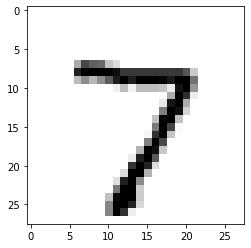

In [17]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

- model 이 어떤 경우에 다른 값을 예측했는지 확인해보자

예측 확률 분포 : [9.8868293e-01 1.8917131e-12 1.3736741e-08 2.1277724e-10 2.0874431e-05
 3.9424169e-10 1.1295830e-02 2.9247037e-13 2.9657031e-07 1.8352495e-09]
라벨 : 6, 예측결과 : 0


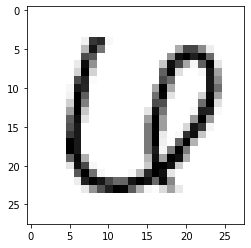

예측 확률 분포 : [6.6961864e-10 1.1220913e-09 1.2037647e-04 9.7099721e-01 6.8068937e-17
 3.4675027e-13 1.9890369e-09 9.6654462e-11 2.8882461e-02 1.2808178e-10]
라벨 : 8, 예측결과 : 3


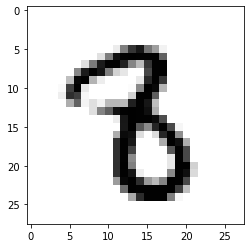

예측 확률 분포 : [5.2840449e-04 7.0317200e-04 2.0539555e-07 5.4133199e-07 1.2921641e-06
 5.0314844e-01 4.4985652e-01 7.7445276e-07 4.5251891e-02 5.0871243e-04]
라벨 : 6, 예측결과 : 5


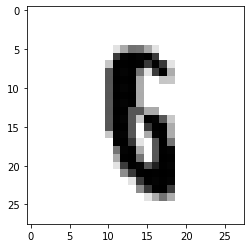

예측 확률 분포 : [1.2428836e-03 2.0134052e-05 7.8389043e-04 5.7122457e-01 7.2743278e-05
 3.0748425e-03 1.0178056e-07 4.9092071e-03 2.6185396e-03 4.1605300e-01]
라벨 : 9, 예측결과 : 3


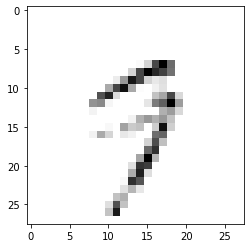

예측 확률 분포 : [2.8277580e-14 1.6151434e-10 1.6537656e-12 9.9955529e-01 4.4975534e-12
 4.4261332e-04 1.8456783e-17 1.8351995e-10 2.4486344e-11 2.0585001e-06]
라벨 : 5, 예측결과 : 3


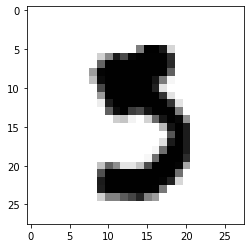

In [18]:
import random
wrong_predict_list = []
for i, _ in enumerate(predicted_labels):
  if predicted_labels[i] != y_test[i]:
    wrong_predict_list.append(i)

# 틀린거 5개만 뽑아보자
samples = random.choices(population = wrong_predict_list, k = 5)

for n in samples:
  print("예측 확률 분포 : " + str(predicted_result[n]))
  print("라벨 : " + str(y_test[n]) + ", 예측결과 : " + str(predicted_labels[n]))
  plt.imshow(x_test[n], cmap = plt.cm.binary)
  plt.show()

## 더 좋은 네트워크 만들기

- 하이퍼파라미터를 바꿔보자

In [20]:
# 바꿀 수 있는 하이퍼파라미터
n_channel_1 = 32
n_channel_2 = 16
n_dense = 32
n_train_epoch = 10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

#모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                12832     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               